In [4]:
import pandas as pd

import time_tech_aggregation as tta
import seaborn as sns
import matplotlib.pyplot as plt
from mplfonts import use_font

In [5]:
use_font('Songti SC')

In [6]:
first_path = '/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/example_data/2050_GH2_T.xlsx'
second_path = '/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/example_data/2050_GH2N_T.xlsx'
marginal_path = '/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/example_data/timeslicecheckandmarginal.xlsx'
cref_path = '/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/color_index.xlsx'
cref_path = '/Users/zhixuan/Desktop/temp/color_index_simplified.xlsx'

data = tta.Data(first_path, second_path, marginal_path, cref_path=cref_path, pref_path='/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/example_data/Province_SubProvince.xlsx', province='Beijing')

In [7]:
data.dataframe['技术'][:-5]

10728    AEElectrolyzer
10729    AEElectrolyzer
10730    AEElectrolyzer
10731    AEElectrolyzer
10732    AEElectrolyzer
              ...      
70766        H2StorageC
70767        H2StorageC
70768        H2StorageC
70769        H2StorageC
70770        H2StorageC
Name: 技术, Length: 2443, dtype: object

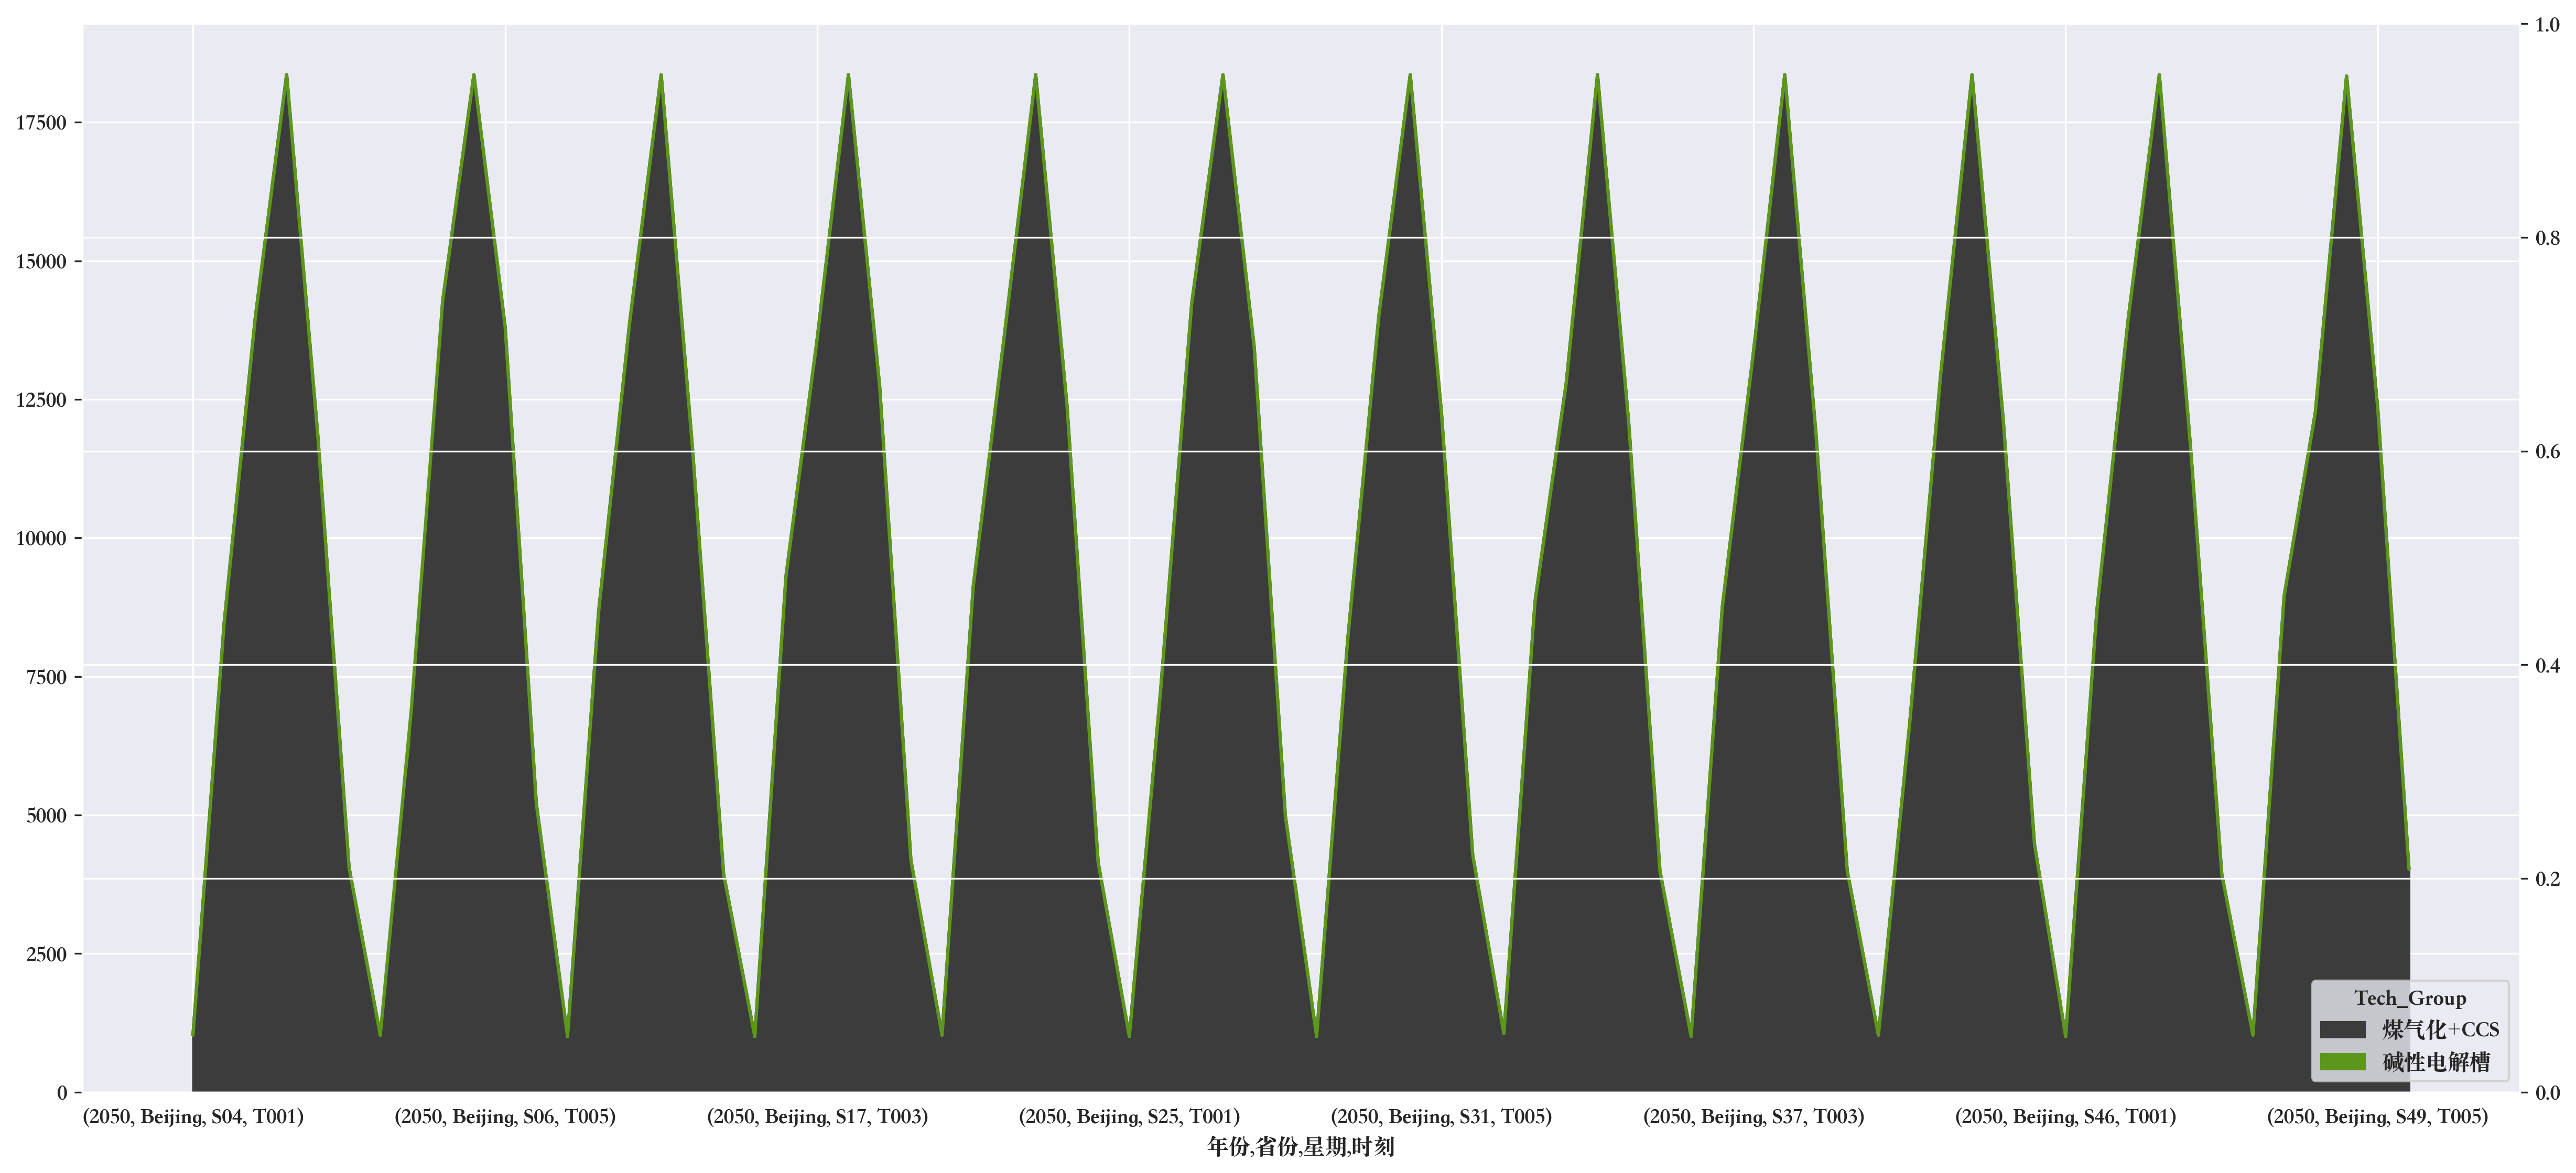

In [8]:
data.stack_plot()

In [9]:
data.aggregated_dataframe.to_excel("/Users/zhixuan/Desktop/check.xlsx")

In [10]:
data.dataframe

,年份,省份,技术,星期,时刻,Level,Tech_Group
10728,2050,Beijing,AEElectrolyzer,S04,T001,0.0,碱性电解槽
10729,2050,Beijing,AEElectrolyzer,S04,T002,0.0,碱性电解槽
10730,2050,Beijing,AEElectrolyzer,S04,T003,0.0,碱性电解槽
10731,2050,Beijing,AEElectrolyzer,S04,T004,0.0,碱性电解槽
10732,2050,Beijing,AEElectrolyzer,S04,T005,0.0,碱性电解槽
...,...,...,...,...,...,...,...
70771,2050,Beijing,H2StorageC,S49,T002,0.0,其他
70772,2050,Beijing,H2StorageC,S49,T003,0.0,其他
70773,2050,Beijing,H2StorageC,S49,T004,0.0,其他
70774,2050,Beijing,H2StorageC,S49,T005,0.0,其他
